In [7]:
from scipy import stats
import scipy
import matplotlib.pyplot as plt
import pandas as pd
import math
import numpy as np

In [2]:
""" Precificação utilizando Black and Scholes.
    cp: +1 -> call; -1 put
    s: valor da ação
    k: strike
    t: tempo em dias até expirar a opção
    v: volatilidade
    rf: taxa de juros neutra risco
"""
def black_scholes (cp, s, k, t, rf, v, div = 0):
        d1 = (math.log(s/k)+(rf+0.5*math.pow(v,2))*t)/(v*math.sqrt(t))
        d2 = d1 - v*math.sqrt(t)

        optprice = (cp*s*math.exp(-div*t)*stats.norm.cdf(cp*d1)) - (cp*k*math.exp(-rf*t)*stats.norm.cdf(cp*d2))
        return optprice

    
""" Calculo da volatilidade implicita
    cp: +1 -> call; -1 put
    s: valor da ação
    k: strike
    t: tempo em dias até expirar a opção
    rf: taxa de juros neutra risco
    price: cotação da opção pelo mercado
    Função H(vol): Seja B(vol) o valor calculado por B&S dada volatilidade, e P a cotação da opção, H(vol) = B(vol) - P
    É a função a ser usada na bisseção
"""    
def volat_impl(cp, s, k, t, rf, price):
    def h(vol):
        return black_scholes(cp, s, k, t, rf, vol) - price
    return scipy.optimize.bisect(h,1e-6,5,xtol=1e-16)

In [3]:
data = pd.read_csv('BRFOODS.csv')

In [8]:
'''
Setting CONSTANTS
'''

sigla_acao = 'BRFS3'
empresa = 'BRFoods S.A.'
preco_acao = 27.00
# dias = [6,28]
dias = np.arange(6,28,1)


puts = data['Tipo'] == 'PUT'
calls = data['Tipo'] == 'CALL'
dia1706 = data['TF'] == '17-06-2019'
dia1507 = data['TF'] == '15-07-2019'

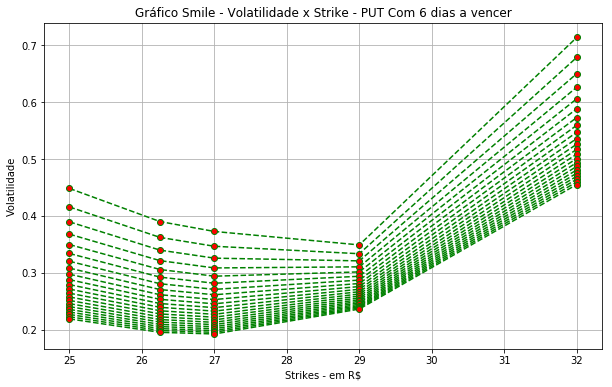

In [10]:
## PUT Com 6 dias a vencer

## Buscando as informações no DataFrame
df_k = data[puts & dia1706].iloc[0:,2:3]
df_s = data[puts & dia1706].iloc[0:,3:4]
ks_put_6 = df_k.values.flatten()
Ss_put_6 = df_s.values.flatten()

## Setando o array com as volatilidades a serem plotadas
vs_put_6 = []
for (k,s) in zip(ks_put_6,Ss_put_6):
    aux = []
    for t in dias:
        aux.append(volat_impl(-1,preco_acao,k,t/365,0.065,s))
    vs_put_6.append(aux)

## Plot do gráfico
plt.figure(figsize=(10,6))
plt.plot(ks_put_6,vs_put_6, marker='o', linestyle='--', color='g', markerfacecolor='r')
plt.xlabel('Strikes - em R$')
plt.ylabel('Volatilidade')
plt.title('Gráfico Smile - Volatilidade x Strike - PUT Com 6 dias a vencer')
plt.grid()
plt.show()

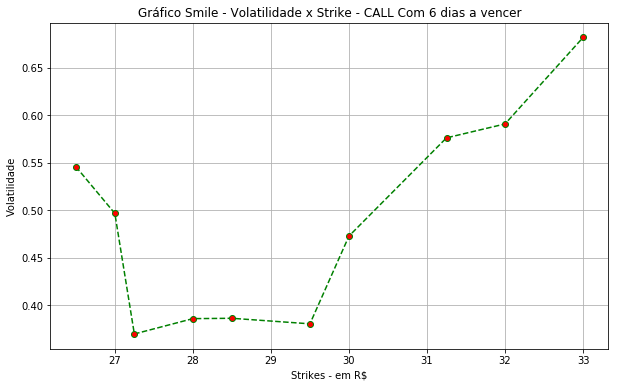

In [189]:
## CALL Com 6 dias a vencer

## Buscando as informações no DataFrame
df_k = data[calls & dia1706].iloc[0:,2:3]
df_s = data[calls & dia1706].iloc[0:,3:4]
ks_call_6 = df_k.values.flatten()
Ss_call_6 = df_s.values.flatten()

## Setando o array com as volatilidades a serem plotadas
vs_call_6 = []
for (k,s) in zip(ks_call_6,Ss_call_6):
    vs_call_6.append(volat_impl(1,preco_acao,k,dias[0]/365,0.065,s))

## Plot do gráfico
plt.figure(figsize=(10,6))
plt.plot(ks_call_6,vs_call_6, marker='o', linestyle='--', color='g', markerfacecolor='r')
plt.xlabel('Strikes - em R$')
plt.ylabel('Volatilidade')
plt.title('Gráfico Smile - Volatilidade x Strike - CALL Com 6 dias a vencer')
plt.grid()
plt.show()

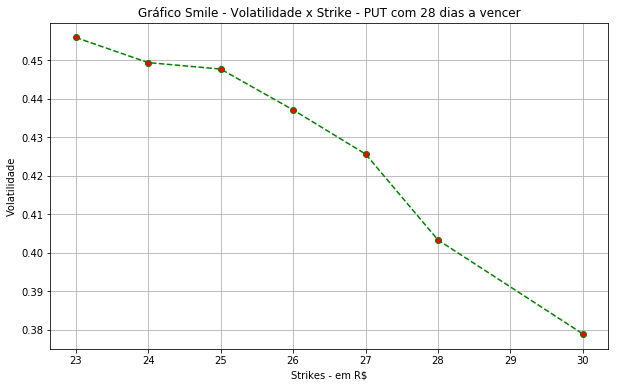

In [190]:
## PUT Com 28 dias a vencer

## Buscando as informações no DataFrame
df_k = data[puts & dia1507].iloc[0:,2:3]
df_s = data[puts & dia1507].iloc[0:,3:4]
ks_put_28 = df_k.values.flatten()
Ss_put_28 = df_s.values.flatten()

## Setando o array com as volatilidades a serem plotadas
vs_put_28 = []
for (k,s) in zip(ks_put_28,Ss_put_28):
    vs_put_28.append(volat_impl(-1,preco_acao,k,dias[1]/365,0.065,s))

## Plot do gráfico
plt.figure(figsize=(10,6))
plt.plot(ks_put_28,vs_put_28, marker='o', linestyle='--', color='g', markerfacecolor='r')
plt.xlabel('Strikes - em R$')
plt.ylabel('Volatilidade')
plt.title('Gráfico Smile - Volatilidade x Strike - PUT com 28 dias a vencer')
plt.grid()
plt.show()

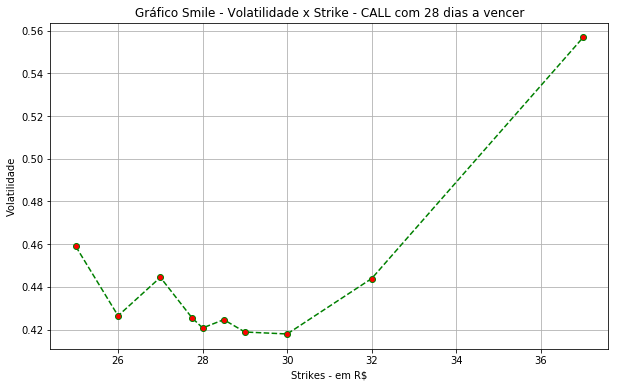

In [191]:
## CALL Com 28 dias a vencer

## Buscando as informações no DataFrame
df_k = data[calls & dia1507].iloc[0:,2:3]
df_s = data[calls & dia1507].iloc[0:,3:4]
ks_call_28 = df_k.values.flatten()
Ss_call_28 = df_s.values.flatten()

## Setando o array com as volatilidades a serem plotadas
vs_call_28 = []
for (k,s) in zip(ks_call_28,Ss_call_28):
    vs_call_28.append(volat_impl(1,preco_acao,k,dias[1]/365,0.065,s))

## Plot do gráfico
plt.figure(figsize=(10,6))
plt.plot(ks_call_28,vs_call_28, marker='o', linestyle='--', color='g', markerfacecolor='r')
plt.xlabel('Strikes - em R$')
plt.ylabel('Volatilidade')
plt.title('Gráfico Smile - Volatilidade x Strike - CALL com 28 dias a vencer')
plt.grid()
plt.show()

---

---